In [78]:
from datascience import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
%matplotlib inline
fpath="https://raw.githubusercontent.com/Sianus/Project_data/main/data/"


# 사용하는 함수

In [129]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)   
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

# About Data

In [80]:
suicide_rat_org = Table.read_table(fpath+"who_suicide_statistics.csv") # 자살률 데이터 / suicide rate original을 줄임
unemp_rat = Table().read_table(fpath+"unemployment_rate.csv", encoding='cp949') # 실업률 / unemploy_rate을 줄임.
cf_depression=Table().read_table(fpath+"counseling_for_depression.csv") # 우울증 상담 / Conseling_for_depression을 줄임
gdp = Table().read_table(fpath+"GDP_in_decrease_rate.csv")
antidepressant = Table().read_table(fpath+"antidepressant.csv") # 항우울제 사용량 / anti depressant
suc_in_oecd=Table().read_table(fpath+"OECD_suicide_rate.csv") # OECD가입국가 자살률 / suicide in OECD

## Suicide_rat data 정리
  

> ### suicide_rat
  - 집계되지 않아 nan으로 표기된 데이터 삭제.
  - 1990년대 이전 데이터 삭제(미사용) 

In [81]:
suicide_rat_org # before

country,year,sex,age,suicides_no,population
Albania,1985,female,15-24 years,nan,277900
Albania,1985,female,25-34 years,nan,246800
Albania,1985,female,35-54 years,nan,267500
Albania,1985,female,5-14 years,nan,298300
Albania,1985,female,55-74 years,nan,138700
Albania,1985,female,75+ years,nan,34200
Albania,1985,male,15-24 years,nan,301400
Albania,1985,male,25-34 years,nan,264200
Albania,1985,male,35-54 years,nan,296700
Albania,1985,male,5-14 years,nan,325800


In [82]:
# nan 및 불필요 데이터 정리
suicide_rat = suicide_rat_org.where('year', are.above_or_equal_to(1990)) #1990년부터
suicide_rat = suicide_rat.where('suicides_no', are.above_or_equal_to(0)) #nan 제거
suicide_rat = suicide_rat.where('population', are.above_or_equal_to(0)) #nan 제거
# suicide 가공 후 
suicide_rat

country,year,sex,age,suicides_no,population
Albania,1992,female,15-24 years,7,292400
Albania,1992,female,25-34 years,4,267400
Albania,1992,female,35-54 years,2,323100
Albania,1992,female,5-14 years,0,336700
Albania,1992,female,55-74 years,1,164900
Albania,1992,female,75+ years,0,38700
Albania,1992,male,15-24 years,9,263700
Albania,1992,male,25-34 years,7,245500
Albania,1992,male,35-54 years,12,343800
Albania,1992,male,5-14 years,0,362900


> ### Korea
  - 한국 데이터만 뽑음.
  - 가독성을 위해 Country열 삭제

In [83]:
korea = suicide_rat.where('country', 'Republic of Korea').drop(0)
korea

year,sex,age,suicides_no,population
1990,female,15-24 years,232,4.2505e+06
1990,female,25-34 years,269,4.1024e+06
1990,female,35-54 years,242,4.7813e+06
1990,female,5-14 years,14,3.7693e+06
1990,female,55-74 years,153,2.4006e+06
1990,female,75+ years,52,450100
1990,male,15-24 years,480,4.5022e+06
1990,male,25-34 years,550,4.2701e+06
1990,male,35-54 years,736,4.9813e+06
1990,male,5-14 years,26,4.0282e+06


> ### K_no_gender
  - Korea에서 성별 분류 무시
  - population sum 단위 조정
  - suicides_no sum -> suicides num 으로 column 변경
  - 55세 이상은 데이터 삭제

In [84]:
k_no_gender = suicide_rat.where('country', 'Republic of Korea').group(['year', 'age'], np.sum).drop(2,3) # 지역명과 성별 날린 데이터
k_no_gender

year,age,suicides_no sum,population sum
1990,15-24 years,712,8.7527e+06
1990,25-34 years,819,8.3725e+06
1990,35-54 years,978,9.7626e+06
1990,5-14 years,40,7.7975e+06
1990,55-74 years,505,4.2597e+06
1990,75+ years,105,644500
1991,15-24 years,652,8.711e+06
1991,25-34 years,815,8.3963e+06
1991,35-54 years,964,1.01029e+07
1991,5-14 years,42,7.6728e+06


In [85]:
k_no_gender['population sum']/=1000 #population sum 단위 조정
k_no_gender=k_no_gender.relabeled('population sum', 'population(unit : 1000)') #단위 조정
k_no_gender=k_no_gender.relabeled('suicides_no sum', 'suicides num') #열 이름 변경
k_no_gender=k_no_gender.with_column('per', 
                (k_no_gender['suicides num']/1000)/k_no_gender['population(unit : 1000)']*100) #비율 추가
k_no_gender=k_no_gender.where('age', are.not_equal_to('55-74 years')).where('age', are.not_equal_to('75+ years')) #나이를 5~54세까지로 한정
k_no_gender

year,age,suicides num,population(unit : 1000),per
1990,15-24 years,712,8752.7,0.00813463
1990,25-34 years,819,8372.5,0.00978202
1990,35-54 years,978,9762.6,0.0100178
1990,5-14 years,40,7797.5,0.000512985
1991,15-24 years,652,8711,0.00748479
1991,25-34 years,815,8396.3,0.00970666
1991,35-54 years,964,10102.9,0.00954181
1991,5-14 years,42,7672.8,0.000547388
1992,15-24 years,702,8652.2,0.00811354
1992,25-34 years,911,8419.6,0.01082


> ### K_no_age
  - Korea에서 나이 분류 무시
  - population sum 단위 조정
  - suicides_no sum -> suicides num 으로 column 변경
  - 2007년부터 2014년으로 제한. 우울증 데이터와 크기 맞춤

In [86]:
k_no_age = suicide_rat.where('country', 'Republic of Korea').group(['year', 'sex'], np.sum).where('year', are.between_or_equal_to(2007,2014)).drop(2,3) # 나이,성별 삭제, 년도 제한
k_no_age = k_no_age.with_column('per', k_no_age[2]/k_no_age[3]*100)
k_no_age

year,sex,suicides_no sum,population sum,per
2007,female,4427,2.33913e+07,0.0189259
2007,male,7747,2.34229e+07,0.0330744
2008,female,4598,2.35357e+07,0.0195363
2008,male,8260,2.3566e+07,0.0350505
2009,female,5475,2.3679e+07,0.0231217
2009,male,9927,2.3701e+07,0.0418844
2010,female,5237,2.37979e+07,0.0220062
2010,male,10321,2.38007e+07,0.0433642
2011,female,5040,2.3908e+07,0.0210808
2011,male,10866,2.389e+07,0.0454834


> ### k_연령
  - k_15_24 : k_no_gender에서 15-24세 자살률
  - k_25_34 : k_no_gender에서 25-34세 자살률
  - k_35_54 : k_no_gender에서 35-54세 자살률

In [87]:
k_15_24=k_no_gender.where('age','15-24 years')
k_25_34=k_no_gender.where('age', '25-34 years')
k_35_54=k_no_gender.where('age', '35-54 years')

## unemp_rat

In [88]:
unemp_rat

년도,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65세 이상
1990,9.2,6.3,3.9,1.8,1.4,1.4,1,1.1,0.9,0.6,0.2
1991,9.3,6.8,3.5,1.4,1.2,1.2,1.2,1,0.7,0.6,0.2
1992,10.3,6.9,3.9,1.6,1.3,1.2,1.1,1,0.7,0.7,0.1
1993,11,8.5,4.6,2,1.6,1.3,1.1,1.1,0.7,0.6,0.2
1994,9.3,6.8,4.2,1.7,1.5,1.4,1.2,0.9,0.7,0.5,0.1
1995,7.9,6,3,1.4,1.3,1.1,1,0.9,1,0.7,0.1
1996,7.4,5.9,3.4,1.6,1.2,1.1,1,1,0.7,0.4,0.3
1997,9.8,7.1,4.1,2,1.7,1.7,1.2,1.3,1.2,1,0.6
1998,20.8,14.8,9.3,5.9,5.5,5.5,5.5,5.9,4.6,3.2,1.5
1999,19.5,12.7,8.5,5.7,4.9,5.2,5.1,5.1,5.1,3.6,0.9


> ### unemp_rat column 변경
  - 자살률 데이터에서 사용되는 연령대로 통일.

In [89]:
unemp_rat = unemp_rat.with_column('15-24', 
                ((unemp_rat['15 - 19세'])+(unemp_rat['20 - 24세']))/2)
unemp_rat = unemp_rat.with_column('25-34', 
                ((unemp_rat['25 - 29세'])+(unemp_rat['30 - 34세']))/2)
unemp_rat = unemp_rat.with_column('35-54', 
                ((unemp_rat['35 - 39세'])+(unemp_rat['40 - 44세'])+(unemp_rat['45 - 49세'])+(unemp_rat['50 - 54세']))/4).drop(1,2,3,4,5,6,7,8,9,10,11)
unemp_rat

년도,15-24,25-34,35-54
1990,7.75,2.85,1.225
1991,8.05,2.45,1.15
1992,8.6,2.75,1.15
1993,9.75,3.3,1.275
1994,8.05,2.95,1.25
1995,6.95,2.2,1.075
1996,6.65,2.5,1.075
1997,8.45,3.05,1.475
1998,17.8,7.6,5.6
1999,16.1,7.1,5.075


In [90]:
unemp_rat=unemp_rat.relabeled('년도','year')
unemp_rat

year,15-24,25-34,35-54
1990,7.75,2.85,1.225
1991,8.05,2.45,1.15
1992,8.6,2.75,1.15
1993,9.75,3.3,1.275
1994,8.05,2.95,1.25
1995,6.95,2.2,1.075
1996,6.65,2.5,1.075
1997,8.45,3.05,1.475
1998,17.8,7.6,5.6
1999,16.1,7.1,5.075


## cf_depression

In [91]:
cf_depression

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2007,전체,19-29세,연령대,339,0.9
2007,전체,19-64세,연령대,2261,1.8
2007,전체,30-39세,연령대,635,1.9
2007,전체,40-49세,연령대,565,1.4
2007,전체,50-59세,연령대,505,3.1
2007,전체,60-69세,연령대,490,3.7
2007,전체,65세이상,연령대,722,4.8
2007,전체,70세이상,연령대,449,4.8
2007,남성,19-29세,성별/연령대,141,0.5


> ### depression_all
  + cf_depression '구분'이 '전체'인 데이터만 뽑음

In [92]:
depression_all = cf_depression.where('구분', '전체')
depression_all

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2008,전체,nan,전체,6817,2.9
2009,전체,nan,전체,7511,3.3
2010,전체,nan,전체,6251,3.4
2011,전체,nan,전체,6026,4.1
2012,전체,nan,전체,5609,4
2013,전체,nan,전체,5365,3.5
2014,전체,nan,전체,5036,5.1


> ### depression_gender
  + '구분'이 '성별'인 데이터만 뽑음

In [93]:
depression_gender= cf_depression.where('구분','성별')
depression_gender

지표년도,성별,연령,구분,조사건수,분율
2007,남성,nan,성별,1242,1.3
2007,여성,nan,성별,1741,3.1
2008,남성,nan,성별,2847,1
2008,여성,nan,성별,3970,4.7
2009,남성,nan,성별,3252,1.6
2009,여성,nan,성별,4259,5
2010,남성,nan,성별,2698,1.6
2010,여성,nan,성별,3553,5.1
2011,남성,nan,성별,2556,2
2011,여성,nan,성별,3470,6.2


## gdp
> 2014년도까지 출력
  - 실업률 데이터에 년도수를 맞춤
    - 실업률이 경제 지표로 사용될 수 있는 근거에서만 사용

In [94]:
gdp=gdp.where('year', are.below(2015))
gdp

year,GDP
1990,9.9
1991,10.8
1992,6.2
1993,6.9
1994,9.3
1995,9.6
1996,7.9
1997,6.2
1998,-5.1
1999,11.5


# 가설 1. 경제가 악화될수록 자살률이 증가한다.
> - 연령대별로 경제와 자살률을 비교한다.
- 경제에 영향을 많이 받는 35-54세에서 경제와 자살률의 관계가 가장 잘 나타날 것


## 실업률과 자살률 그래프

In [98]:
# 실업률과 차이가 큼. 그래프 개형으로 비교하는 것이 목적이라서 per를 맞춤.
k_15_24['per']*=100
k_25_34['per']*=100
k_35_54['per']*=100

### 25-34세

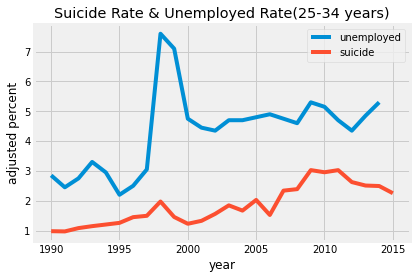

In [99]:
fig = plt.figure()
ax = plt.axes()
ax.plot(unemp_rat['year'],unemp_rat['25-34'], label="unemployed")
ax.plot(k_25_34['year'], k_25_34['per'], label='suicide')
ax.set(title='Suicide Rate & Unemployed Rate(25-34 years)', xlabel='year', ylabel='adjusted percent')
ax.legend();

0.503874914689694

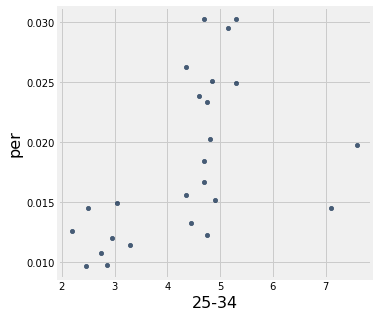

In [159]:
unemp_suicide_25_34=Table().with_columns('year', unemp_rat['year'], '25-34', unemp_rat['25-34'], 'per', k_25_34.where('year', are.below(2015))['per'])
unemp_suicide_25_34.scatter('25-34', 'per')
correlation(unemp_suicide_25_34, '25-34', 'per')

### 35-54세

35-54세가 경제의 영향을 가장 많이 받는다

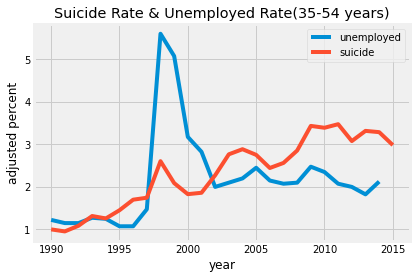

In [100]:
fig = plt.figure()
ax = plt.axes()
ax.plot(unemp_rat['year'],unemp_rat['35-54'], label="unemployed")
ax.plot(k_35_54['year'], k_35_54['per'], label='suicide')
ax.set(title='Suicide Rate & Unemployed Rate(35-54 years)', xlabel='year', ylabel='adjusted percent')
ax.legend();

0.3284954793417221

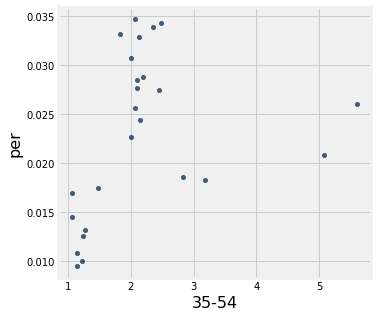

In [160]:
unemp_suicide_35_54=Table().with_columns('year', unemp_rat['year'], '35-54', unemp_rat['35-54'], 'per', k_35_54.where('year', are.below(2015))['per'])
unemp_suicide_35_54.scatter('35-54', 'per')
correlation(unemp_suicide_35_54, '35-54', 'per')

### 15-24세

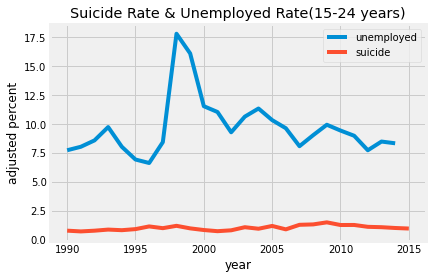

In [101]:
fig = plt.figure()
ax = plt.axes()
ax.plot(unemp_rat['year'],unemp_rat['15-24'], label="unemployed")
ax.plot(k_15_24['year'], k_15_24['per'], label='suicide')
ax.set(title='Suicide Rate & Unemployed Rate(15-24 years)', xlabel='year', ylabel='adjusted percent')
ax.legend();

## 실업률이 경제 지표가 될 수 있는 근거
> GDP 최저점과 실업률 최고점이 같은 시기

GDP가 최저였을 때와 실업률이 최대였을때의 년도가 같다.

In [102]:
gdp.where('GDP', np.min(gdp['GDP']))

year,GDP
1998,-5.1


In [103]:
unemp_rat.where('25-34', np.max(unemp_rat['25-34'])) 

year,15-24,25-34,35-54
1998,17.8,7.6,5.6


1998년 IMF 시기에서 감소한 GDP가 1999년에 급격하게 증가하여 outlier로 간주하고 제거 후 상관계수를 구한다.

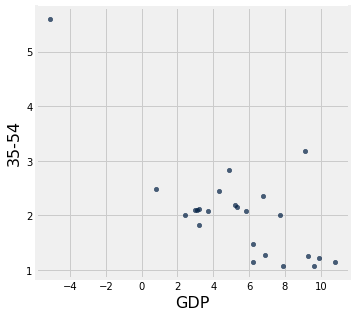

In [104]:
#1999년 outlier 제거
without_outlier=Table().with_columns('year', gdp['year'],'GDP', gdp['GDP'], '25-34', unemp_rat['25-34'], '35-54', unemp_rat['35-54']).where('year', are.not_equal_to(1999))
without_outlier.scatter('GDP', '35-54')

In [105]:
correlation(without_outlier, 'GDP', '35-54') #GDP와 35-54세 실업률

-0.7358445643233124

In [106]:
correlation(without_outlier, 'GDP', '25-34') #GDP와 25-34세 실업률

-0.8216473644890768

강한 음의 상관관계를 보인다.

### GDP와 실업률 그래프

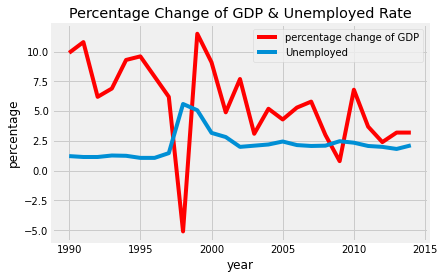

In [107]:
fig = plt.figure()
ax = plt.axes()
ax.plot(gdp['year'], gdp['GDP'], label='percentage change of GDP', color='red')
ax.plot(unemp_rat['year'], unemp_rat['35-54'], label='Unemployed')
ax.set(title='Percentage Change of GDP & Unemployed Rate', xlabel='year', ylabel='percentage');
ax.legend();

## 한국 25~54세 자살률과 경제 성장률의 관계

  - 1998년 IMF와 2007~2008년 세계 금융위기 시기에 자살률의 급증을 확인
  - 사회생활이 적은 15-24세와 주축을 이루는 35-54세의 자살률과 경제의 흐름을 통해 경제가 자살의 원인 중 하나임을 확인

In [108]:
# 자살률과 비교해야하므로 단위 복구
k_15_24['per']/=100
k_25_34['per']/=100
k_35_54['per']/=100

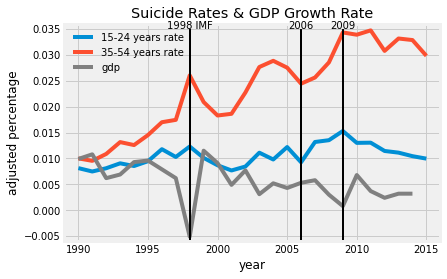

In [109]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k_15_24['year'], k_15_24['per'], label='15-24 years rate')
ax.plot(k_35_54['year'], k_35_54['per'], label='35-54 years rate')
ax.plot(gdp['year'], gdp['GDP']/1000, label='gdp', c='grey')
ax.legend(loc='upper left', frameon=False)
ax.set(title='Suicide Rates & GDP Growth Rate', xlabel='year', ylabel='adjusted percentage', xlim=[1989, 2016], ylim=[-0.006, 0.036])
ax.plot([1998, 1998], [-0.006, 0.035], color='black', linewidth=2)
ax.text(1998, 0.035, "1998 IMF", ha='center'); 
ax.plot([2006, 2006], [-0.006, 0.035], color='black', linewidth=2)
ax.text(2006, 0.035, "2006", ha='center')
ax.plot([2009, 2009], [-0.006, 0.035], color='black', linewidth=2)
ax.text(2009, 0.035, "2009", ha='center');

# 추가분석 1
> + 연령대는 35 - 54세 고정
+ 남녀 데이터를 만듦.
+ male(female)/total_population(35-54) 그래프를 그림
+ 경제가 자살률에 영향을 끼친다고 가정하면, 여성의 자살률 증가는 여성의 경제활동이 활발해졌음을 의미

## **Caution**
1998년도에 여성 자살률이 최저점인 것은 남성의 자살률이 높았기 때문.
즉, 두 그래프의 합은 1.

In [110]:
k_female=suicide_rat.where('country', 'Republic of Korea').where('sex', 'female')
k_female=k_female.with_column('per', k_female['suicides_no']/k_female['population']*100)
female_35_54=k_female.where('age', '35-54 years')
female_35_54

country,year,sex,age,suicides_no,population,per
Republic of Korea,1990,female,35-54 years,242,4.7813e+06,0.00506138
Republic of Korea,1991,female,35-54 years,256,4.9512e+06,0.00517046
Republic of Korea,1992,female,35-54 years,312,5.1196e+06,0.00609423
Republic of Korea,1993,female,35-54 years,381,5.3012e+06,0.00718705
Republic of Korea,1994,female,35-54 years,383,5.4951e+06,0.00696985
Republic of Korea,1995,female,35-54 years,427,5.7252e+06,0.00745825
Republic of Korea,1996,female,35-54 years,532,5.9683e+06,0.00891376
Republic of Korea,1997,female,35-54 years,535,6.1634e+06,0.00868027
Republic of Korea,1998,female,35-54 years,714,6.3234e+06,0.0112914
Republic of Korea,1999,female,35-54 years,683,6.4973e+06,0.0105121


In [111]:
k_male=suicide_rat.where('country', 'Republic of Korea').where('sex', 'male')
k_male=k_male.with_column('per', k_male['suicides_no']/k_male['population']*100)
male_35_54=k_male.where('age', '35-54 years')
male_35_54

country,year,sex,age,suicides_no,population,per
Republic of Korea,1990,male,35-54 years,736,4.9813e+06,0.0147753
Republic of Korea,1991,male,35-54 years,708,5.1517e+06,0.013743
Republic of Korea,1992,male,35-54 years,823,5.317e+06,0.0154787
Republic of Korea,1993,male,35-54 years,1040,5.4949e+06,0.0189266
Republic of Korea,1994,male,35-54 years,1025,5.6901e+06,0.0180137
Republic of Korea,1995,male,35-54 years,1265,5.9288e+06,0.0213365
Republic of Korea,1996,male,35-54 years,1533,6.1787e+06,0.024811
Republic of Korea,1997,male,35-54 years,1656,6.3877e+06,0.0259248
Republic of Korea,1998,male,35-54 years,2644,6.5682e+06,0.0402546
Republic of Korea,1999,male,35-54 years,2087,6.7585e+06,0.0308796


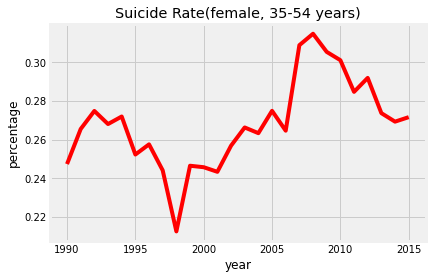

In [112]:
#35-54세 
plt.plot(female_35_54['year'], female_35_54['suicides_no']/k_35_54['suicides num'], color='red')
plt.title('Suicide Rate(female, 35-54 years)')
plt.xlabel('year')
plt.ylabel('percentage');

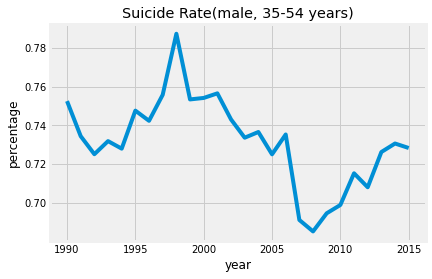

In [113]:
plt.plot(male_35_54['year'], male_35_54['suicides_no']/k_35_54['suicides num'])
plt.title('Suicide Rate(male, 35-54 years)')
plt.xlabel('year')
plt.ylabel('percentage');

# 추가분석 2
> + 1998년 IMF는 아시아권 전체에 영향을 끼침
+ 일본과 태국, 미국 데이터 확인
  + 일본과 태국 1998년도 자살률이 급증하고, 미국은 별 차이가 없다 = 경제가 자살률에 영향을 준다.

In [114]:
# 각 국가별 자살률
japan = suicide_rat.where('country', 'Japan')
usa = suicide_rat.where('country', 'United States of America')
thailand = suicide_rat.where('country', 'Thailand')

In [115]:
# 단위 조정 및 label 변경
japan['population']/=1000
usa['population']/=1000
thailand['population']/=1000
japan.relabeled('population', 'population(unit : 1000)')
usa.relabeled('population', 'population(unit : 1000)')
thailand.relabeled('population', 'population(unit : 1000)')

country,year,sex,age,suicides_no,population(unit : 1000)
Thailand,1990,female,15-24 years,511,5917.57
Thailand,1990,female,25-34 years,339,4920.57
Thailand,1990,female,35-54 years,290,6146.48
Thailand,1990,female,5-14 years,43,5772.12
Thailand,1990,female,55-74 years,102,2660.15
Thailand,1990,female,75+ years,29,515.149
Thailand,1990,male,15-24 years,753,6077.08
Thailand,1990,male,25-34 years,622,4749.65
Thailand,1990,male,35-54 years,665,5708.26
Thailand,1990,male,5-14 years,51,5967.62


In [116]:
# 연도별로 성별, 연령 분류 없이 Table 하나 생성
japan_total = japan.group('year', sum).select(0,4,5)
usa_total = usa.group('year', sum).select(0,4,5)
thailand_total = thailand.group('year', sum).select(0,4,5)

In [117]:
# 연도별 자살률 분석을 위해 자살률 Table에 추가
japan_per = japan_total.with_column('suicide per', (japan_total.column(1)/1000/japan_total.column(2))*100)
usa_per = usa_total.with_column('suicide per', (usa_total.column(1)/1000/usa_total.column(2))*100)
thailand_per = thailand_total.with_column('suicide per', (thailand_total.column(1)/1000/thailand_total.column(2))*100)

In [118]:
# 일본 자살률표
japan_graph=japan_per.select(0,3)

In [119]:
# 태국 자살률표
thailand_graph=thailand_per.select(0,3)

In [120]:
# 미국 자살률표
usa_graph=usa_per.select(0,3)

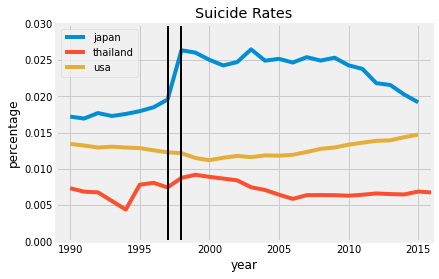

In [166]:
plt.plot(japan_graph['year'], japan_graph['suicide per'],label='japan')
plt.plot(thailand_graph['year'], thailand_graph['suicide per'],label='thailand')
plt.plot(usa_graph['year'], usa_graph['suicide per'],label='usa')
plt.legend()
plt.title('Suicide Rates')
plt.plot([1997,1997], [0,0.03], color='black', linewidth=2)
plt.plot([1998,1998], [0,0.03], color='black', linewidth=2)
plt.xlim(1989, 2016)
plt.ylim(0,0.03)
plt.xlabel('year')
plt.ylabel('percentage');

# 가설 2. 우울증 상담을 받으면 자살할 확률이 낮아진다.

In [122]:
cf_depression

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2007,전체,19-29세,연령대,339,0.9
2007,전체,19-64세,연령대,2261,1.8
2007,전체,30-39세,연령대,635,1.9
2007,전체,40-49세,연령대,565,1.4
2007,전체,50-59세,연령대,505,3.1
2007,전체,60-69세,연령대,490,3.7
2007,전체,65세이상,연령대,722,4.8
2007,전체,70세이상,연령대,449,4.8
2007,남성,19-29세,성별/연령대,141,0.5


In [123]:
#2007~2014 남녀 자살률
k_no_age

year,sex,suicides_no sum,population sum,per
2007,female,4427,2.33913e+07,0.0189259
2007,male,7747,2.34229e+07,0.0330744
2008,female,4598,2.35357e+07,0.0195363
2008,male,8260,2.3566e+07,0.0350505
2009,female,5475,2.3679e+07,0.0231217
2009,male,9927,2.3701e+07,0.0418844
2010,female,5237,2.37979e+07,0.0220062
2010,male,10321,2.38007e+07,0.0433642
2011,female,5040,2.3908e+07,0.0210808
2011,male,10866,2.389e+07,0.0454834


> 우울증 상담

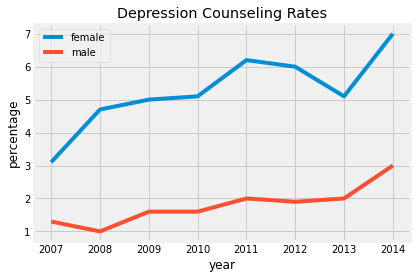

In [124]:
plt.plot(depression_gender.where('성별', '여성')['지표년도'], depression_gender.where('성별', '여성')['분율'], label='female')
plt.plot(depression_gender.where('성별', '남성')['지표년도'], depression_gender.where('성별', '남성')['분율'], label='male')
plt.legend()
plt.title('Depression Counseling Rates')
plt.xlabel('year')
plt.ylabel('percentage');

> 자살률

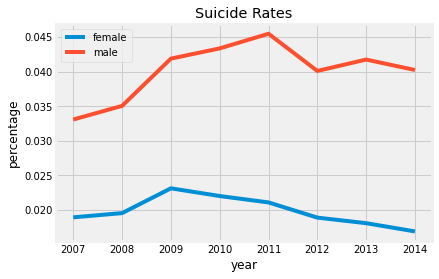

In [125]:
plt.plot(k_no_age.where('sex', 'female')['year'], k_no_age.where('sex', 'female')['per'], label='female')
plt.plot(k_no_age.where('sex', 'male')['year'], k_no_age.where('sex', 'male')['per'], label='male')
plt.legend()
plt.title('Suicide Rates')
plt.xlabel('year')
plt.ylabel('percentage');